In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.layers import *
from keras.models import * 
from keras.preprocessing import image

In [ ]:
TRAIN_PATH = "../input/pneumonia-xray-images/train"
VAL_PATH = "../input/pneumonia-xray-images/test"

In [ ]:
from keras.layers import BatchNormalization,GlobalAveragePooling2D
from keras.applications.mobilenet_v2 import MobileNetV2
base_model=MobileNetV2(weights='imagenet',include_top=False,input_shape=(500,500,3))
base_model.trainable=False

In [ ]:
from keras import models
from keras import layers
from keras.models import *
from keras.layers import *
import keras






model=Sequential()
model.add(base_model)
model.add(BatchNormalization())
model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1,activation='sigmoid'))
model.compile(optimizer=keras.optimizers.Adam(),loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
train_datagen = image.ImageDataGenerator(rescale = 1./255, shear_range = 0.2,zoom_range = 0.2, vertical_flip = True)

test_dataset = image.ImageDataGenerator(rescale=1./255)

In [ ]:
train_generator = train_datagen.flow_from_directory(
    TRAIN_PATH,
    target_size = (500,500),
    batch_size = 16,
    class_mode = 'binary',
    color_mode='rgb')
validation_generator = test_dataset.flow_from_directory(
    VAL_PATH,
    target_size = (500,500),
    batch_size = 16,
    class_mode = 'binary',
    color_mode='rgb')

In [ ]:
hist_new = model.fit_generator(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs = 10,
    validation_data = validation_generator,
    validation_steps=len(validation_generator)
    
)

In [ ]:
model.save('pneumonia_cnn_.h5')

In [45]:
hist_new.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

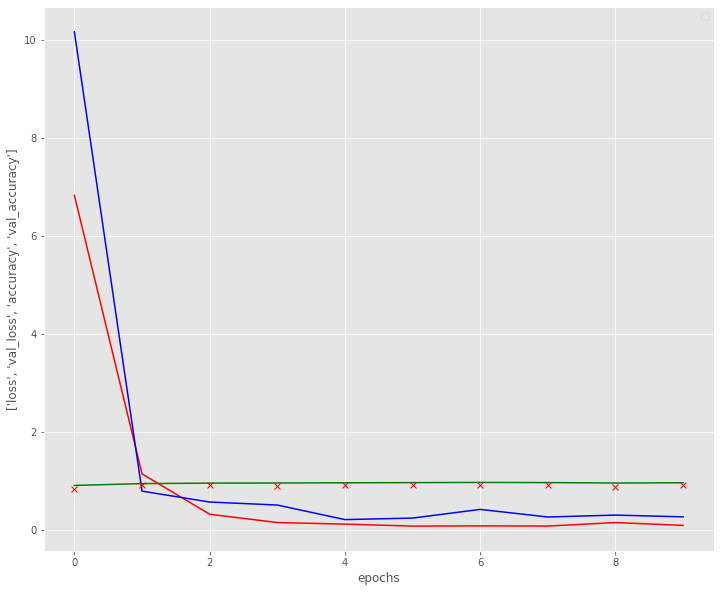

In [38]:
import matplotlib.pyplot as plt
import pandas as pd
df=pd.DataFrame(hist_new.history)
plt.style.use('ggplot')
plt.figure(figsize=(12,10))
plt.plot(df['loss'],'r')
plt.plot(df['val_loss'],'b')
plt.plot(df['accuracy'],'g')
plt.plot(df['val_accuracy'],'rx')
plt.xlabel('epochs')
plt.ylabel(['loss','val_loss','accuracy','val_accuracy'])
plt.legend();

In [43]:
import plotly.express as px
import plotly
plotly.offline.init_notebook_mode (connected = True)
fig=px.line(x=range(10),y=df['loss'],labels={'x':'epochs','y':'training_loss'})
fig.show()

In [44]:
fig=px.line(x=range(10),y=df['val_loss'],labels={'x':'epochs','y':'validation_loss'})
fig.show()

In [46]:
fig=px.line(x=range(10),y=df['val_accuracy'],labels={'x':'epochs','y':'validation_accuracy'})
fig.show()